In [1]:
"""
QPSK/OFDM Transmitter + Receiver Simulation

1. Generate bits
2. QPSK modulation
3. OFDM modulation
4. Channel
5. ???
6. Demodulation
7. Analysis

Date created: 6/9/25
Author: Cole Delong
"""

'\nQPSK/OFDM Transmitter + Receiver Simulation\n\n1. Generate bits\n2. QPSK modulation\n3. OFDM modulation\n4. Channel\n5. ???\n6. Demodulation\n7. Analysis\n\nDate created: 6/9/25\nAuthor: Cole Delong\n'

In [60]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
N_BITS = int(64*10)

# OFDM
N_SUBCARRIERS = 64
SYMBOLS_PER_PILOT = 3
CP_LENGTH = 8

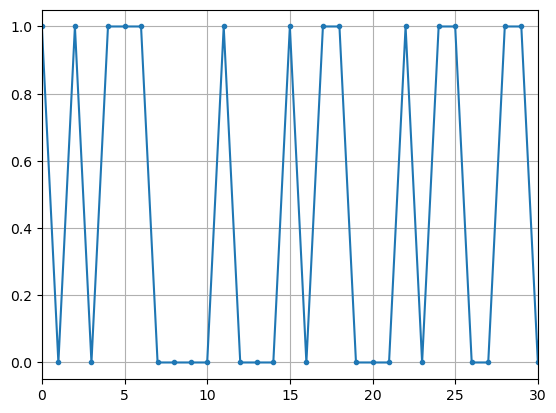

In [44]:
### Generate bits ###
bits = np.random.binomial(n=1, p=0.5, size=N_BITS)
bits

plt.plot(bits, '.-')
plt.grid(True)
plt.xlim([0, 30])
plt.show()

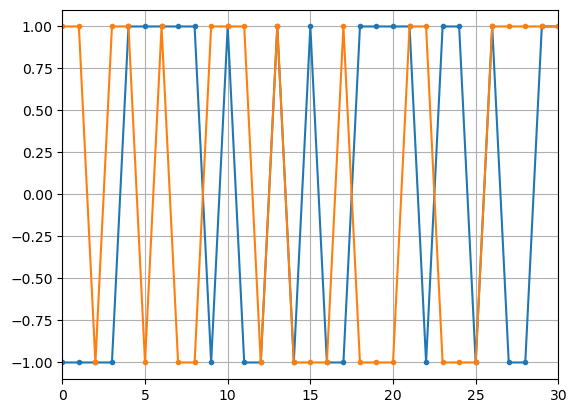

In [45]:
### QPSK modulation ###
bit_pairs = bits.reshape(-1, 2)
mapping = {
    (0, 0):  1 + 1j,
    (0, 1):  1 - 1j,
    (1, 1): -1 - 1j,
    (1, 0): -1 + 1j,
}
qpsk_symbols = np.array([mapping[tuple(pair)] for pair in bit_pairs])

plt.plot(qpsk_symbols.real, '.-')
plt.plot(qpsk_symbols.imag, '.-')
plt.xlim([0, 30])
plt.grid(True)
plt.show()

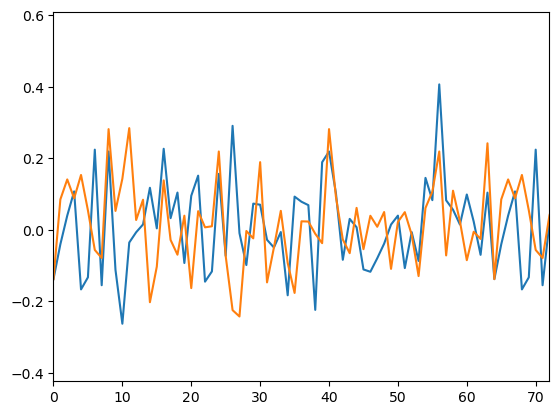

In [70]:
### OFDM modulation ###

# Insert pilot symbols into array
pilot_tone = 1 + 1j;
pilot_indicies = np.arange(0, len(qpsk_symbols), SYMBOLS_PER_PILOT)

ofdm_freq = np.insert(qpsk_symbols, pilot_indicies, pilot_tone)

# Split up ofdm symbols into subcarriers
if len(ofdm_freq) % N_SUBCARRIERS != 0:
    n_needed = N_SUBCARRIERS - (len(ofdm_freq) % N_SUBCARRIERS)
    zeros = np.repeat(1 + 1j, n_needed)
    ofdm_freq = np.append(ofdm_freq, zeros)

ofdm_freq = ofdm_freq.reshape(-1, N_SUBCARRIERS)

# IFFT
ofdm_time = np.fft.ifft(ofdm_freq, axis=1)

# Add cyclic prefixes
plt.show()
cyclic_prefixes = [symbol[-CP_LENGTH:] for symbol in ofdm_time]
ofdm_time = np.hstack((cyclic_prefixes, ofdm_time))

# Serialize symbols
ofdm_time = np.concatenate(ofdm_time)

plt.plot(ofdm_time.real)
plt.plot(ofdm_time.imag)
plt.xlim([0, 64+8])
plt.show()